# Diagonal Tracing
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [imgFX_tracing.ipynb](https://github.com/diegoinacio/creative-coding-notebooks/blob/master/Generative/imgFX_tracing.ipynb)
---
Image effect algorithm that produces stylized diagonal stripes with color conditionals.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random, math, time
from PIL import Image as image

from _utils import *

In [2]:
def clamp(value, vmin, vmax):
    '''
    Clamp function
    '''
    if(value < vmin):
        value = vmin
    if(value > vmax):
        value = vmax
    return value

def searchPoints(po):
    '''
    Search points
    '''
    co = imgIn.getpixel((clamp(po[0], 0, imx - 1),
                         clamp(po[1], 0, imy - 1)))
    pi, ci = po, co
    x, y = po[0], po[1]
    while((x < imx) or (y < imy)):
        x += 1
        y += 1
        try:
            pi = (x, y)
            ci = imgIn.getpixel(pi)
            if((abs(ci[0] - co[0]) > colorDisp) +
               (abs(ci[1] - co[1]) > colorDisp) +
               (abs(ci[2] - co[2]) > colorDisp)):
                pi = (x - 1, y - 1)
                ci = imgIn.getpixel(pi)
                break
        except:
            continue
    return po, pi, co, ci

def drawL(tx, ty, rad, cd):
    '''
    Draw a trace
    '''
    for i in range(rad + 1):
        try:
            px = int(tx - rad/2 + i)
            py = int(ty + rad/2 - i)
            imgOut.putpixel((px, py), cd)
        except:
            continue

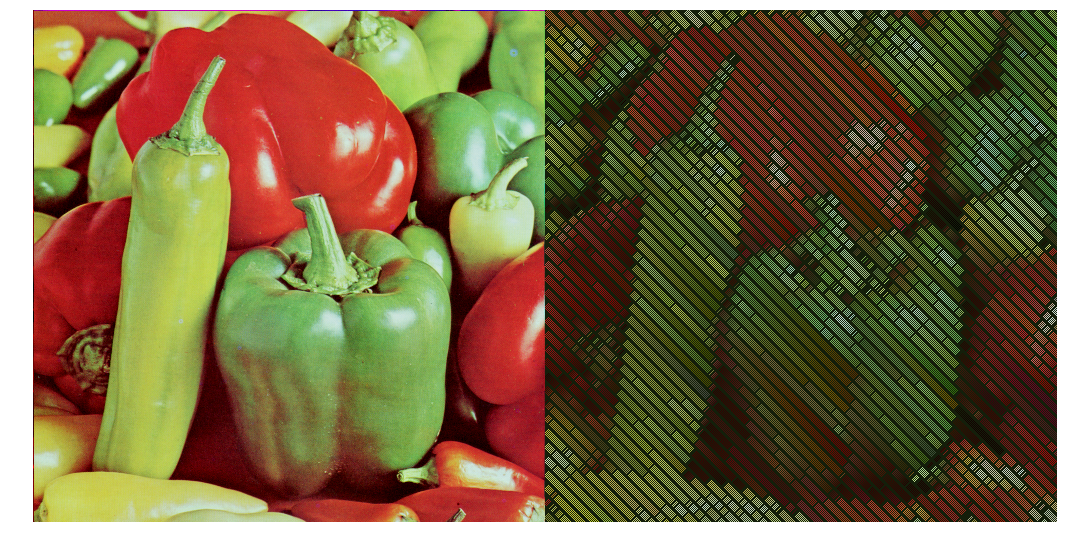

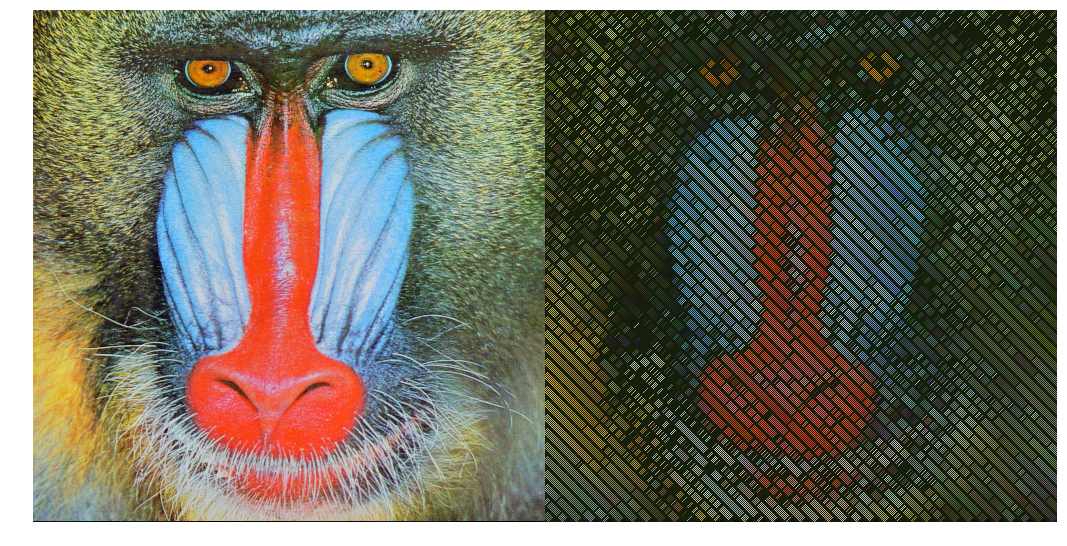

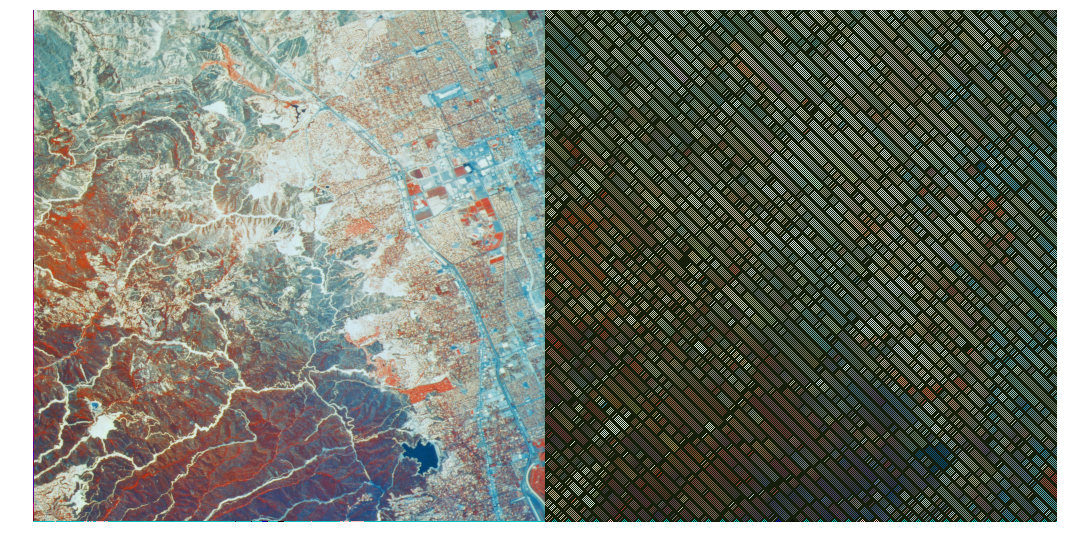

Wall time: 3.16 s


In [3]:
%%time
# parameters
rad = 4
sb = 6
colorDisp = 50    # color dispersion tolerance
BG = (20, 30, 10) # background color

# init
lista_img = ['pimentos.png', 'babuino.png', 'aerial03.png']
for imagem in lista_img:
    img = image.open('../_data/' + imagem)
    imx = img.size[0]
    imy = img.size[1]
    imgIn = image.new('RGB', img.size)
    imgIn.paste(img)
    imgOut = image.new('RGB', img.size, BG)

    # execution
    x, y = 0, 0
    i, j = 0, 0
    po = (0, 0)
    imyy = imy
    while(x < imx):
        while(y < imyy):
            i, j = po[0], po[1]
            while((i < imx) or (j < imy)):
                po, pi, co, ci = searchPoints(po)

                cd = co
                dx = (pi[0] - po[0])
                try:
                    rs = (float(ci[0]) - float(co[0]))/dx
                    gs = (float(ci[1]) - float(co[1]))/dx
                    bs = (float(ci[2]) - float(co[2]))/dx
                    cs = (rs, gs, bs)
                except:
                    cs = (1, 1, 1)

                for k in range(dx):
                    drawL(k + i, k + j, rad, cd)
                    cd = (int(cd[0] + cs[0]), int(cd[1] + cs[1]), int(cd[2] + cs[2]))

                i = clamp(pi[0] + 1, 0, imx)
                j = clamp(pi[1] + 1, 0, imy)
                po = (i, j)

            if(x == 0):
                y += clamp(rad*2 + sb, 0, imy - 1)
            else:
                y = imyy
            po = (x, y)

        x += clamp(rad*2 + sb, 0, imx - 1)
        y = 0
        po = (x, y)
        imyy = 1

    output = np.array([np.asarray(imgIn),
                       np.asarray(imgOut)])
    panel(output, (2, 1))